In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score


In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [3]:
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
customer_summary = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_summary[['TotalValue', 'Quantity']])


In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
customer_summary['Cluster'] = clusters


In [7]:
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.72127971818163


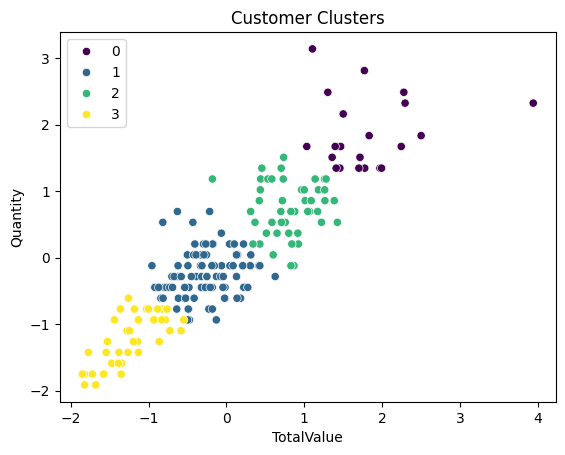

In [8]:
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette='viridis')
plt.xlabel('TotalValue')
plt.ylabel('Quantity')
plt.title('Customer Clusters')
plt.show()


In [9]:
# prompt: Export the clustering results to a PDF:

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# ... (your existing code)

# Create a PDF file
with PdfPages('clustering_results.pdf') as pdf:
    # Plot the scatter plot
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette='viridis')
    plt.xlabel('TotalValue')
    plt.ylabel('Quantity')
    plt.title('Customer Clusters')

    # Save the plot to the PDF
    pdf.savefig()
    plt.close() # Close the figure to free resources

    # Add a page with the Davies-Bouldin Index
    plt.figure(figsize=(8, 2)) # Adjust figure size if needed
    plt.text(0.1, 0.5, f"Davies-Bouldin Index: {db_index}", fontsize=12)
    plt.axis('off') # Hide axes
    pdf.savefig()
    plt.close()

print("Clustering results exported to clustering_results.pdf")

Clustering results exported to clustering_results.pdf
